# Tic-Tac-Toe Agent.I have used my own version of the agent code.Have tried to use QLearning class to define the process  

#### Importing libraries

In [33]:
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [34]:
 statetrack={}

#Creating a QLearning Class that will take in the Hyperparameters and perform the Epsilon-greedy strategy and update the Q-Values based on the strategy to the Q-table.

In [35]:
class Qlearning:
    # Hyper Parameters are set here
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9, values=[]):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []
     
        

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()

    # esilon greedy stratergy
    def epsilon_greedy(self, state, possible_moves): #epsilon greedy algorithm
        #return  action
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: #greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # more than 1 best option; choose among them randomly
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def getQ(self, state, action): #get Q states
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update Q states using Qlearnning
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)
        
          
    def saveQ(self,file_name):  #save Q-table
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(self.Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(self.Q.keys())) 
    
    def saveS(self,file_name):  #save State table
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(statetrack, handle, protocol=pickle.HIGHEST_PROTOCOL)
                   

    def loadQ(self,file_name): # load table
        with open(file_name + '.pkl', 'rb') as handle:
            self.Q = pickle.load(handle)
    

In [36]:
# We will now train the agent with the first move and Q-Values

from TCGame_Env_Main import TicTacToe

game = TicTacToe() #game instance
player1_agent =  Qlearning(values=[1,3,5,7,9]) #player1 learning agent
player2_envt =  Qlearning(values=[2,4,6,8]) #player2 learning Environment
game.startTraining(player1_agent,player2_envt, 5000000, verbose=False) #train for 5000000 episodes
game.saveStates()  #save Qtables

Training Started
Training Completed
11472938
6981222


In [37]:
# Getting the Q-Table for the Agent and for the Environment
Agent_player_Q, Envt_player_Q = game.getQ()

In [38]:
# lenght of the Q-Table for agent
len(Agent_player_Q)

11472938

In [39]:
# Q-Values from the Q-Table for the Agent
Agent_player_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 1): -3.3050535518113957,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 2): -2.4440096136312035,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 3): -4.730858368683704,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 4): -3.3034055545013805,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): -3.5199733887307216,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 6): -3.031920545567706,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 7): -2.8853690125173803,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 8): -3.313009205388333,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -3.1753775803262716,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 1): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 2): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 3): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 4): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 5): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 6): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 7): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 1, 0), 9): 1.0,
 ((0, 0, 0, 0, 0, 8, 0, 1, 0), 1): -3.0633973708909092,
 ((0, 0, 0, 0, 0, 8, 0, 1, 0), 2): -2.029127022785399,
 ((0, 0, 0, 0, 0, 8, 0, 1, 0), 3): -3.5604270754396734,
 ((0, 0, 0, 

### Check Q for one of state based on various actions.State chosen is (0, 0, 0, 0, 5, 8, 0, 0, 0)

In [40]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 1)]

-4.023412104061749

In [41]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 2)]

-4.0287918450574685

In [42]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 3)]

-2.6257367098101785

In [43]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 4)]

-3.9305874189919354

In [44]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 7)]

-3.9081891584147708

In [45]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 8)]

-6.167584364650713

In [46]:
Agent_player_Q[((0, 0, 0, 0, 5, 8, 0, 0, 0), 9)]

-5.226292831329755

# Epsilon - decay check

In [47]:
epsilon=0.2
max_epsilon = 1.0
min_epsilon = 0.1
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

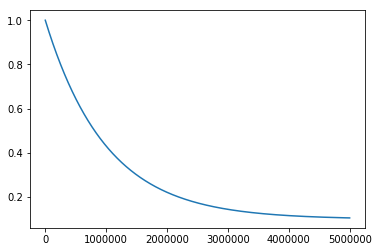

In [48]:
plt.plot(time, epsilon)
plt.show()